In [1]:
#Se cargan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##Se leen ambos archivos y se les asginan variables
df = pd.read_csv('flujos-vid-2018.csv', engine='python')
df = df.drop(df.index[0]).reset_index(drop=True)
df = pd.DataFrame(df)

fd = pd.read_csv('meteo-vid-2018.csv', engine='python')
fd = fd.drop(df.index[0]).reset_index(drop=True)
fd = pd.DataFrame(fd)  
cols = ['albedo_Avg']
fd[cols] = fd[cols].apply(pd.to_numeric, errors='coerce', axis=1)

dfw = pd.read_csv('meteo-vid-2018.csv', engine='python')


In [3]:
dfw = dfw.drop(dfw.columns[2:110], axis=1, inplace=False)   
dfw['albedo']= fd['albedo_Avg']
dfw['AIRTC_AVG'] = fd['AirTC_Avg']
dfw['RH'] = fd['RH']
dfw['WS_ms_S_WVT'] = fd ['WS_ms_S_WVT']
dfw['rs'] = fd ['Rs_net_Avg']
dfw['LATITUD']='28º 55.117'
dfw['LONGITU']='111º 18.638'
dfw['altitud']='101'
dfw['Date'] = dfw['Date'] + ' ' + dfw['Time']
dfw['Date'] = pd.to_datetime(dfw.apply(lambda x: x['Date'], 1), dayfirst=True)
dfw = dfw.set_index('Date')

In [4]:
dfw['TMAX'] = dfw.resample('D')["AIRTC_AVG"].max()
dfw['albedo'] = dfw.resample('D')['albedo'].mean()
dfw['TMIN'] = dfw.resample('D')['AIRTC_AVG'].min()
dfw['TMEAN'] = dfw.resample('D')['AIRTC_AVG'].mean()
dfw['RHMAX'] = dfw.resample('D')['RH'].max()
dfw['RHMIN'] = dfw.resample('D')['RH'].min()
dfw['RHMEAN'] = dfw.resample('D')['RH'].mean()
dfw['RSmean'] = dfw.resample('D')['rs'].mean()
dfwm = dfw.resample('D').mean()
dfwmm = dfwm.resample('M').mean()
dfwmm = dfwmm.rename_axis('Date').reset_index()
dfwmm['LATITUD']='28º 55.117'
dfwmm['LONGITU']='111º 18.638'
dfwmm['altitud']='101'
dfwmm = dfwmm[:-1]

In [5]:
#La tabla solicitada
dfwmm

,Date,albedo,AIRTC_AVG,RH,WS_ms_S_WVT,rs,TMAX,TMIN,TMEAN,RHMAX,RHMIN,RHMEAN,RSmean,LATITUD,LONGITU,altitud
0,2018-01-31,-0.427896,17.040454,38.443696,1.939813,108.867028,27.352800,7.356400,16.923758,66.784800,13.938800,38.490158,113.231767,28º 55.117,111º 18.638,101
1,2018-02-28,-0.479853,17.228586,48.175327,1.963638,126.347946,25.320357,9.383929,17.228586,72.828571,25.725357,48.175327,126.347946,28º 55.117,111º 18.638,101
2,2018-03-31,-0.409502,19.284456,36.963024,1.925974,170.104845,29.519355,8.851613,19.284456,68.612903,15.204839,36.963024,170.104845,28º 55.117,111º 18.638,101
3,2018-04-30,-0.386014,21.883014,40.793118,2.102167,213.415479,32.671667,10.781667,21.883014,76.913667,15.712333,40.793118,213.415479,28º 55.117,111º 18.638,101
4,2018-05-31,-0.368202,23.651734,44.226781,2.113891,237.179395,34.133548,12.741935,23.651734,80.031290,17.229032,44.226781,237.179395,28º 55.117,111º 18.638,101
5,2018-06-30,-0.381063,28.417743,50.829132,2.154187,224.636507,36.968333,19.525333,28.417743,81.874667,26.013000,50.829132,224.636507,28º 55.117,111º 18.638,101
6,2018-07-31,-0.189483,31.069704,57.640027,2.022184,200.422735,38.419355,24.491935,31.069704,85.231290,32.805806,57.640027,200.422735,28º 55.117,111º 18.638,101
7,2018-08-31,-0.381197,30.121210,68.870202,1.911270,189.466653,36.985806,24.680645,30.121210,92.681613,42.205484,68.870202,189.466653,28º 55.117,111º 18.638,101
8,2018-09-30,-0.487950,29.660674,66.618340,1.790153,183.134257,37.576000,23.580667,29.660674,93.100000,36.606333,66.618340,183.134257,28º 55.117,111º 18.638,101
9,2018-10-31,-0.613819,23.242520,68.698320,1.664691,148.383145,31.346452,16.490645,23.242520,94.895484,37.131613,68.698320,148.383145,28º 55.117,111º 18.638,101


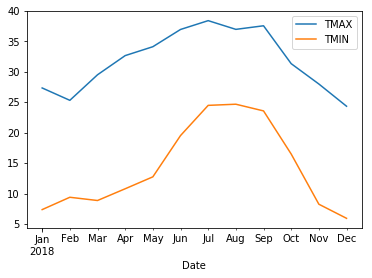

In [6]:
#Se elabora la primera gráfica
dfwmm.plot(x='Date',y=["TMAX","TMIN"])

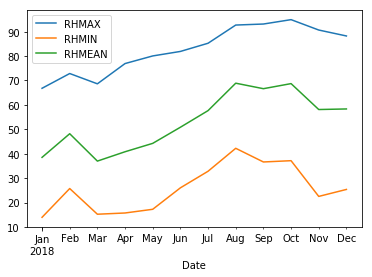

In [7]:
#Se elabora la segunda gráfica
dfwmm.plot(x='Date', y=['RHMAX','RHMIN','RHMEAN'])

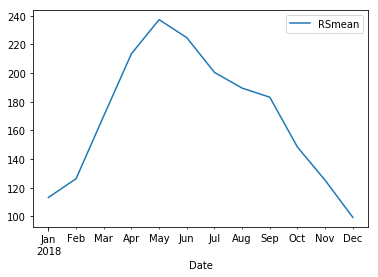

In [8]:
#Se elabora la tercer gráfica
dfwmm.plot(x='Date', y=['RSmean'])

In [9]:
dfet = dfwmm.drop(dfw.columns[1:110], axis=1, inplace=False)   


dfet['J&H'] = ((.0252  * dfwmm.TMEAN) + .078) * dfwmm.RSmean

dfet ['Vali'] = ((.0393 * dfwmm.rs)*((dfwmm.TMEAN + 9.5)**(.5))) - (.019 * (dfwmm.rs)**(.6) * ((0.5047)**(.15)))
+ .0061 * (dfwmm.TMEAN + 20) * (1.12 * dfwmm.TMEAN - dfwmm.TMIN - 2)**(.7)

#Se tuvo dificultades para calcular Valiantzas 4

0     1.096905
1     0.966073
2     1.263139
3     1.431550
4     1.493847
5     1.511455
6     1.371110
7     1.200339
8     1.257417
9     1.085026
10    1.030014
11    0.907952
dtype: float64

In [10]:
dfet

,Date,J&H,Vali
0,2018-01-31,57.123016,21.707101
1,2018-02-28,64.710412,25.358636
2,2018-03-31,95.933737,35.492638
3,2018-04-30,134.334790,46.557414
4,2018-05-31,159.864532,53.212588
5,2018-06-30,178.389943,53.920169
6,2018-07-31,172.555266,49.757124
7,2018-08-31,158.593912,46.470604
8,2018-09-30,151.167985,44.648118
9,2018-10-31,98.483601,33.023849


In [11]:
dfu = df[['Rg_f', 'LE_f', 'H_f', 'Hour', 'DoY', 'Year' ]].copy()

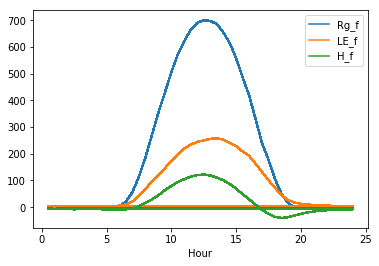

In [12]:
dfu = dfu.apply(pd.to_numeric, errors='coerce')
dfu["Rg_f"] = dfu.groupby(["Hour"])["Rg_f"].transform("mean")
dfu["LE_f"] = dfu.groupby(["Hour"])["LE_f"].transform("mean")
dfu["H_f"] = dfu.groupby(["Hour"])["H_f"].transform("mean")



dfu.plot(x='Hour', y=[('Rg_f'),('LE_f'),('H_f')])